In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
#train_df = pd.read_csv("results_jan.csv", sep='\t')
train_df = pd.read_csv("results_june.csv", sep='\t')
##train_df = pd.read_csv("results_dec.csv", sep='\t')
pd.set_option('display.max_columns', 500)
train_df.tail()

,MAGER,MRACE31,DMAR,MEDUC,FAGEREC11,FRACE6,FEDUC,PRIORLIVE,PRIORDEAD,PRIORTERM,LBO_REC,TBO_REC,ILLB_R11,ILP_R11,PRECARE,WIC,CIG0_R,CIG1_R,CIG2_R,CIG3_R,CIG_REC,M_Ht_In,BMI,WTGAIN_REC,RF_PDIAB,RF_GDIAB,RF_PHYPE,RF_GHYPE,RF_EHYPE,RF_PPTERM,RF_INFTR,RF_FEDRG,RF_ARTEC,RF_CESAR,NO_RISKS,IP_GON,IP_SYPH,IP_CHLAM,IP_HEPB,IP_HEPC,NO_INFEC,NO_MMORB,AB_NICU
1631536,25,1.0,2.0,3.0,3,9.0,1.0,1,0,0,2,2,4.0,4.0,3.0,Y,0.0,0.0,0.0,0.0,N,59.0,27.5,2,N,N,N,N,N,N,N,N,X,X,N,1.0,N,N,N,N,N,1.0,N
1631537,26,1.0,2.0,2.0,6,2.0,2.0,1,0,2,2,4,5.0,5.0,2.0,N,0.0,0.0,0.0,0.0,N,64.0,24.9,2,N,N,N,N,N,N,N,N,X,X,Y,0.0,N,N,N,N,N,1.0,N
1631538,35,13.0,2.0,5.0,7,1.0,3.0,0,0,0,1,1,88.0,88.0,7.0,N,0.0,0.0,0.0,0.0,N,65.0,21.3,5,N,N,N,N,N,N,N,N,X,X,N,1.0,N,N,N,N,N,1.0,N
1631539,22,2.0,2.0,3.0,3,2.0,6.0,0,0,1,1,2,88.0,99.0,3.0,Y,0.0,0.0,0.0,0.0,N,65.0,25.6,5,N,N,N,N,N,N,N,N,X,X,N,1.0,N,N,N,N,N,1.0,N
1631540,38,2.0,2.0,3.0,7,2.0,3.0,2,0,2,3,5,8.0,99.0,8.0,N,0.0,0.0,0.0,0.0,N,69.0,19.2,5,N,N,N,N,N,N,N,N,X,X,N,1.0,N,N,N,N,N,1.0,N


In [60]:
impute_u = ["RF_PDIAB", "RF_GDIAB", "RF_PHYPE", "RF_GHYPE", "RF_EHYPE", "RF_PPTERM", "RF_INFTR","RF_FEDRG", "RF_ARTEC",
 "RF_CESAR","NO_RISKS", "IP_GON", "IP_SYPH", "IP_CHLAM", "IP_HEPB", "IP_HEPC", "NO_INFEC", "AB_NICU", "CIG_REC", "WIC" ]

for item in impute_u:
    train_df[item].fillna("U", inplace=True)    


# many values belongs to first category : White race
train_df["MRACE31"].fillna(train_df['MRACE31'].median(), inplace=True)


impute_9 = ["FRACE6", "FEDUC", "MEDUC", "DMAR", "NO_MMORB"]
for item in impute_9:
    train_df[item].fillna(9., inplace=True)

impute_99 = ["ILLB_R11","ILP_R11", "PRECARE", "M_Ht_In","BMI"]
for item in impute_99:
    train_df[item].fillna(99., inplace=True)

impute_6 = ["CIG0_R","CIG1_R","CIG2_R", "CIG3_R"]
for item in impute_6:
    train_df[item].fillna(6., inplace=True)

In [61]:
#train_df.isnull().values.sum()
train_df.isnull().sum()

MAGER         0
MRACE31       0
DMAR          0
MEDUC         0
FAGEREC11     0
FRACE6        0
FEDUC         0
PRIORLIVE     0
PRIORDEAD     0
PRIORTERM     0
LBO_REC       0
TBO_REC       0
ILLB_R11      0
ILP_R11       0
PRECARE       0
WIC           0
CIG0_R        0
CIG1_R        0
CIG2_R        0
CIG3_R        0
CIG_REC       0
M_Ht_In       0
BMI           0
WTGAIN_REC    0
RF_PDIAB      0
RF_GDIAB      0
RF_PHYPE      0
RF_GHYPE      0
RF_EHYPE      0
RF_PPTERM     0
RF_INFTR      0
RF_FEDRG      0
RF_ARTEC      0
RF_CESAR      0
NO_RISKS      0
IP_GON        0
IP_SYPH       0
IP_CHLAM      0
IP_HEPB       0
IP_HEPC       0
NO_INFEC      0
NO_MMORB      0
AB_NICU       0
dtype: int64

In [62]:
def parseToInt(val):
    if(val == 'X'):
        return 0
    elif(val == 'U'):
        return 1
    elif(val == 'N'):
        return 2
    elif(val == 'Y'):
        return 3
    else:
        return 4

In [63]:
cols_to_parse = ['WIC', 'CIG_REC', 'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPTERM', 'RF_INFTR', 'RF_FEDRG',
'RF_ARTEC', 'RF_CESAR', 'NO_RISKS', 'IP_GON','IP_SYPH', 'IP_CHLAM', 'IP_HEPB', 'IP_HEPC', 'NO_INFEC', 'AB_NICU'   ]

for item in cols_to_parse:
    train_df[item] = pd.DataFrame(list(map(parseToInt, train_df[item])))

In [64]:
df_corr = train_df.corr()
df_corr

,MAGER,MRACE31,DMAR,MEDUC,FAGEREC11,FRACE6,FEDUC,PRIORLIVE,PRIORDEAD,PRIORTERM,LBO_REC,TBO_REC,ILLB_R11,ILP_R11,PRECARE,WIC,CIG0_R,CIG1_R,CIG2_R,CIG3_R,CIG_REC,M_Ht_In,BMI,WTGAIN_REC,RF_PDIAB,RF_GDIAB,RF_PHYPE,RF_GHYPE,RF_EHYPE,RF_PPTERM,RF_INFTR,RF_FEDRG,RF_ARTEC,RF_CESAR,NO_RISKS,IP_GON,IP_SYPH,IP_CHLAM,IP_HEPB,IP_HEPC,NO_INFEC,NO_MMORB,AB_NICU
MAGER,1.000000,0.005657,-0.060221,0.382104,0.213742,-0.145014,0.098593,0.084851,0.004243,0.023938,0.299638,0.317259,-0.229716,-0.163326,-0.005204,-0.267657,-0.053366,-0.031352,-0.020833,-0.016770,-0.084008,0.062488,0.030664,-0.012204,0.008854,0.086737,0.032319,-0.001470,-0.018028,-0.018028,0.024596,0.087340,0.121993,0.133055,0.134116,-0.019097,-0.033983,-0.019830,-0.098390,-0.011252,-0.017143,0.035065,0.009111
MRACE31,0.005657,1.000000,0.041018,0.025508,0.032898,0.120727,0.049397,-0.002472,-0.000660,0.004018,-0.010374,-0.003671,0.019129,0.023045,0.020514,0.001284,0.021785,0.027841,0.030265,0.031418,-0.032982,-0.004467,0.010683,-0.004982,-0.014705,0.008165,-0.011897,-0.015052,-0.018543,-0.018543,-0.009979,-0.017023,0.003926,0.005733,-0.009623,0.024363,-0.016066,-0.020201,-0.005981,-0.008957,-0.021834,0.018345,-0.002824
DMAR,-0.060221,0.041018,1.000000,-0.092000,0.046023,0.085066,-0.002824,-0.009914,-0.009916,-0.014064,-0.012881,-0.024782,0.005454,0.004251,-0.028904,0.127873,-0.012754,-0.012708,-0.014451,-0.012978,0.014860,-0.047144,-0.010128,-0.025024,0.016222,0.007555,0.008689,0.003120,0.019712,0.019712,-0.001850,-0.003581,-0.030618,-0.025972,0.005581,0.020696,0.024848,0.025142,0.028068,0.021911,0.022768,-0.026548,0.011014
MEDUC,0.382104,0.025508,-0.092000,1.000000,-0.043539,-0.177535,0.357841,-0.032663,0.011303,0.006173,-0.173145,-0.143346,0.120326,0.082252,0.108916,-0.467641,0.031147,0.066584,0.086372,0.091539,-0.241783,0.253887,0.069286,0.066591,-0.196213,-0.106219,-0.158944,-0.106414,-0.220945,-0.220945,-0.160934,-0.068267,0.175298,0.176143,-0.090979,-0.218953,-0.219096,-0.222063,-0.211553,-0.208917,-0.214781,0.236816,-0.109069
FAGEREC11,0.213742,0.032898,0.046023,-0.043539,1.000000,0.591928,0.616055,0.051254,0.012149,0.022302,0.153073,0.159839,-0.078909,-0.038877,0.030482,0.040182,0.065485,0.064692,0.059283,0.056567,0.079117,0.020769,0.046738,-0.005849,0.009906,0.017872,0.024950,0.005975,-0.001431,-0.001431,0.031610,0.019276,0.025433,0.031075,0.048999,-0.000989,0.009029,-0.004107,0.031969,-0.002747,0.014326,-0.003592,0.039203
FRACE6,-0.145014,0.120727,0.085066,-0.177535,0.591928,1.000000,0.474645,0.028366,0.016711,0.018845,0.049533,0.048072,0.032061,0.051408,0.112024,0.151863,0.141187,0.146547,0.144568,0.141825,0.020058,0.052824,0.113506,-0.015579,-0.094816,-0.057350,-0.075532,-0.056465,-0.119283,-0.119283,-0.049895,-0.113560,0.006567,0.005243,-0.044453,-0.161294,-0.100390,-0.122723,-0.020927,-0.115577,-0.098328,0.112380,-0.017873
FEDUC,0.098593,0.049397,-0.002824,0.357841,0.616055,0.474645,1.000000,-0.004904,0.012862,0.012572,-0.066600,-0.050609,0.086639,0.076845,0.110558,-0.192205,0.106951,0.123844,0.129057,0.128158,-0.060299,0.170089,0.066278,0.046105,-0.138542,-0.096466,-0.109784,-0.077300,-0.156676,-0.156676,-0.093592,-0.070000,0.099764,0.100796,-0.073417,-0.154289,-0.138555,-0.158214,-0.086108,-0.150850,-0.134893,0.155635,-0.049023
PRIORLIVE,0.084851,-0.002472,-0.009914,-0.032663,0.051254,0.028366,-0.004904,1.000000,0.756780,0.636040,0.486217,0.396542,-0.101557,-0.056959,0.137369,-0.006331,0.032989,0.038999,0.040941,0.040356,-0.003786,0.067816,0.078274,0.047498,-0.028921,-0.013794,-0.022598,-0.029195,-0.036840,-0.036840,0.010125,-0.035536,0.000141,-0.000471,0.028640,0.003580,-0.042960,-0.045696,-0.035459,-0.043664,-0.038158,0.047116,-0.012652
PRIORDEAD,0.004243,-0.000660,-0.009916,0.011303,0.012149,0.016711,0.012862,0.756780,1.000000,0.695266,0.306309,0.232990,0.048991,0.063149,0.140132,-0.026575,0.026383,0.028777,0.030332,0.030323,-0.016781,0.065107,0.060817,0.065401,-0.028695,-0.021063,-0.024004,-0.020297,-0.032469,-0.032469,-0.018462,-0.024207,0.009388,0.008743,-0.017086

In [65]:
df_corr = df_corr[df_corr['AB_NICU'] > 0]
df_corr

,MAGER,MRACE31,DMAR,MEDUC,FAGEREC11,FRACE6,FEDUC,PRIORLIVE,PRIORDEAD,PRIORTERM,LBO_REC,TBO_REC,ILLB_R11,ILP_R11,PRECARE,WIC,CIG0_R,CIG1_R,CIG2_R,CIG3_R,CIG_REC,M_Ht_In,BMI,WTGAIN_REC,RF_PDIAB,RF_GDIAB,RF_PHYPE,RF_GHYPE,RF_EHYPE,RF_PPTERM,RF_INFTR,RF_FEDRG,RF_ARTEC,RF_CESAR,NO_RISKS,IP_GON,IP_SYPH,IP_CHLAM,IP_HEPB,IP_HEPC,NO_INFEC,NO_MMORB,AB_NICU
MAGER,1.000000,0.005657,-0.060221,0.382104,0.213742,-0.145014,0.098593,0.084851,0.004243,0.023938,0.299638,0.317259,-0.229716,-0.163326,-0.005204,-0.267657,-0.053366,-0.031352,-0.020833,-0.016770,-0.084008,0.062488,0.030664,-0.012204,0.008854,0.086737,0.032319,-0.001470,-0.018028,-0.018028,0.024596,0.087340,0.121993,0.133055,0.134116,-0.019097,-0.033983,-0.019830,-0.098390,-0.011252,-0.017143,0.035065,0.009111
DMAR,-0.060221,0.041018,1.000000,-0.092000,0.046023,0.085066,-0.002824,-0.009914,-0.009916,-0.014064,-0.012881,-0.024782,0.005454,0.004251,-0.028904,0.127873,-0.012754,-0.012708,-0.014451,-0.012978,0.014860,-0.047144,-0.010128,-0.025024,0.016222,0.007555,0.008689,0.003120,0.019712,0.019712,-0.001850,-0.003581,-0.030618,-0.025972,0.005581,0.020696,0.024848,0.025142,0.028068,0.021911,0.022768,-0.026548,0.011014
FAGEREC11,0.213742,0.032898,0.046023,-0.043539,1.000000,0.591928,0.616055,0.051254,0.012149,0.022302,0.153073,0.159839,-0.078909,-0.038877,0.030482,0.040182,0.065485,0.064692,0.059283,0.056567,0.079117,0.020769,0.046738,-0.005849,0.009906,0.017872,0.024950,0.005975,-0.001431,-0.001431,0.031610,0.019276,0.025433,0.031075,0.048999,-0.000989,0.009029,-0.004107,0.031969,-0.002747,0.014326,-0.003592,0.039203
LBO_REC,0.299638,-0.010374,-0.012881,-0.173145,0.153073,0.049533,-0.066600,0.486217,0.306309,0.242221,1.000000,0.862219,-0.578722,-0.401324,0.052610,0.074183,0.037750,0.048257,0.049441,0.047097,0.054729,0.003379,0.070596,-0.048298,0.005368,0.027068,0.013817,-0.036740,-0.006398,-0.006398,0.134083,-0.038269,-0.041039,-0.040694,0.190921,0.008274,-0.007187,-0.006945,-0.016660,-0.006792,0.004348,0.009043,0.000634
TBO_REC,0.317259,-0.003671,-0.024782,-0.143346,0.159839,0.048072,-0.050609,0.396542,0.232990,0.335843,0.862219,1.000000,-0.518529,-0.328412,0.045402,0.062384,0.060529,0.066084,0.064634,0.061785,0.072060,0.009277,0.069912,-0.043064,0.006680,0.033618,0.018668,-0.027511,-0.010427,-0.010427,0.135843,-0.022431,-0.016366,-0.014988,0.183173,-0.000125,-0.011704,-0.012262,-0.018698,-0.011663,0.002873,0.013702,0.013323
WIC,-0.267657,0.001284,0.127873,-0.467641,0.040182,0.151863,-0.192205,-0.006331,-0.026575,-0.019667,0.074183,0.062384,-0.073536,-0.048947,-0.150539,1.000000,-0.101446,-0.133182,-0.151661,-0.156636,0.217978,-0.267228,-0.113015,-0.068996,0.207814,0.117303,0.172093,0.111988,0.232384,0.232384,0.153152,0.100865,-0.151669,-0.149647,0.097547,0.227529,0.229544,0.235018,0.208286,0.223038,0.221117,-0.247738,0.104977
CIG_REC,-0.084008,-0.032982,0.014860,-0.241783,0.079117,0.020058,-0.060299,-0.003786,-0.016781,-0.011640,0.054729,0.072060,-0.090436,-0.068229,-0.211077,0.217978,0.124319,0.053073,-0.042543,-0.076645,1.000000,-0.262320,-0.198736,-0.019343,0.272021,0.150802,0.233534,0.152931,0.319992,0.319992,0.222130,0.203245,-0.132937,-0.127969,0.128531,0.319310,0.310031,0.320617,0.245076,0.303285,0.342497,-0.336885,0.159421
RF_PDIAB,0.008854,-0.014705,0.016222,-0.196213,0.009906,-0.094816,-0.138542,-0.028921,-0.028695,-0.027266,0.005368,0.006680,-0.112321,-0.102569,-0.381769,0.207814,-0.409616,-0.452533,-0.472939,-0.470074,0.272021,-0.472526,-0.323605,-0.006830,1.000000,0.317964,0.535269,0.352307,0.695430,0.695430,0.424765,0.487540,-0.230225,-0.218491,0.268273,0.625439,0.628103,0.666862,0.455871,0.635378,0.604089,-0.677671,0.311085
RF_GDIAB,0.086737,0.008165,0.007555,-0.106219,0.017872,-0.057350,-0.096466,-0.013794,-0.021063,-0.018592,0.027068,0.033618,-0.082359,-0.071895,-0.226215,0.117303,-0.238413,-0.264091,-0.276147,-0.275257,0.150802,-0.290118,-0.150963,-0.052571,0.317964,1.000000,0.313153,0.239179,0.398704,0.398704,0.251946,0.297186,-0.108279,-0.101527,0.174753,0.356743,0.

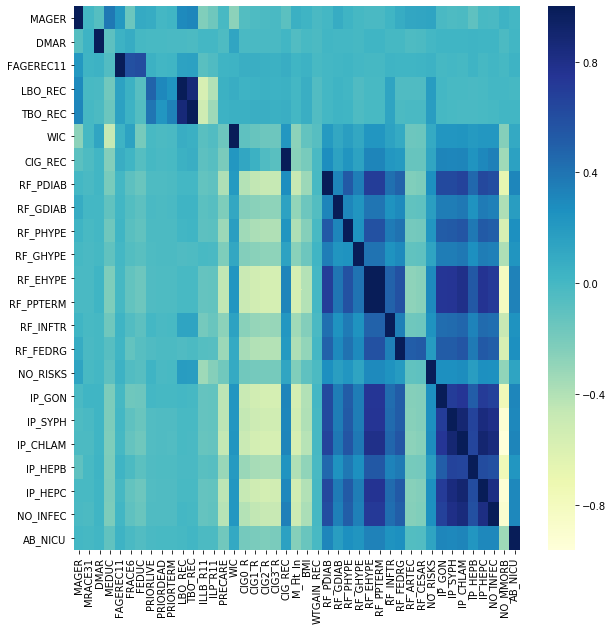

In [66]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_corr, cmap="YlGnBu")

In [39]:
avg = (df_corr['AB_NICU']).mean(axis=0)
avg

0.23719028908483855

In [40]:
ser = df_corr.loc['AB_NICU']
ser = ser[ser > avg]
ser

RF_PDIAB     0.311085
RF_PHYPE     0.269350
RF_EHYPE     0.338306
RF_PPTERM    0.338306
RF_INFTR     0.250051
RF_FEDRG     0.269473
IP_GON       0.313531
IP_SYPH      0.305862
IP_CHLAM     0.323621
IP_HEPC      0.307353
NO_INFEC     0.304596
AB_NICU      1.000000
Name: AB_NICU, dtype: float64

In [42]:
df_corr =df_corr[df_corr['AB_NICU'] > avg]

In [56]:
df_corr[np.array(ser.index)]

,RF_PDIAB,RF_PHYPE,RF_EHYPE,RF_PPTERM,RF_INFTR,RF_FEDRG,IP_GON,IP_SYPH,IP_CHLAM,IP_HEPC,NO_INFEC,AB_NICU
RF_PDIAB,1.000000,0.535269,0.695430,0.695430,0.424765,0.487540,0.625439,0.628103,0.666862,0.635378,0.604089,0.311085
RF_PHYPE,0.535269,1.000000,0.584265,0.584265,0.367289,0.413848,0.523200,0.525831,0.558148,0.530748,0.506213,0.269350
RF_EHYPE,0.695430,0.584265,1.000000,1.000000,0.489083,0.579689,0.744353,0.747474,0.793493,0.756194,0.718390,0.338306
RF_PPTERM,0.695430,0.584265,1.000000,1.000000,0.489083,0.579689,0.744353,0.747474,0.793493,0.756194,0.718390,0.338306
RF_INFTR,0.424765,0.367289,0.489083,0.489083,1.000000,0.343519,0.439617,0.443428,0.468512,0.446441,0.431209,0.250051
RF_FEDRG,0.487540,0.413848,0.579689,0.579689,0.343519,1.000000,0.522835,0.524036,0.557791,0.532628,0.503036,0.269473
IP_GON,0.625439,0.523200,0.744353,0.744353,0.439617,0.522835,1.000000,0.702942,0.745769,0.710939,0.675496,0.313531
IP_SYPH,0.628103,0.525831,0.747474,0.747474,0.443428,0.524036,0.702942,1.000000,0.889847,0.845399,0.805077,0.305862
IP_CHLAM,0.666862,0.558148,0.793493,0.793493,0.468512,0.557791,0.745769,0.889847,1.000000,0.897014,0.852836,0.323621
IP_HEPC,0.635378,0.530748,0.756194,0.756194,0.446441,0.532628,0.710939,0.845399,0.897014,1.000000,0.816823,0.307353


In [48]:
df_final = df_corr[np.array(ser.index)]

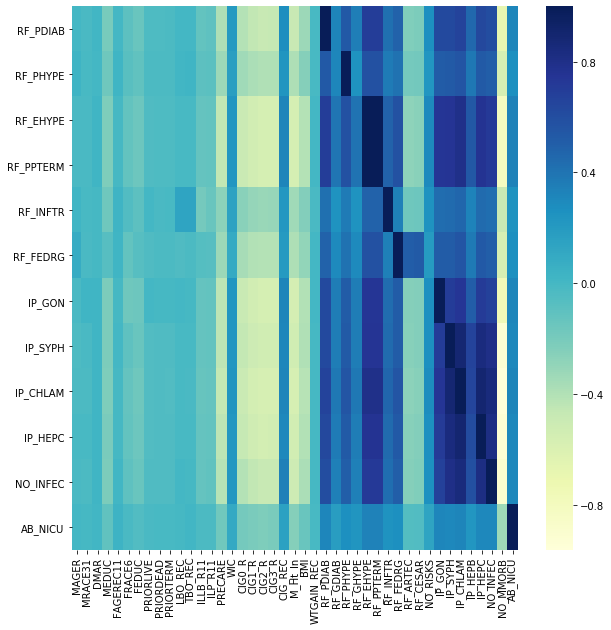

In [57]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_corr, cmap="YlGnBu")